In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import math
import statistics as stats

In [14]:
datafile = "CCM Computing Entry Survey - Fall 2020.csv"
df = pd.read_csv(datafile)

In [15]:
pd.set_option('precision', 2)

In [16]:
df.head()

,Timestamp,Which course are you enrolled in?,How did you hear about County College of Morris? [CCM Web site],How did you hear about County College of Morris? [Social Media],How did you hear about County College of Morris? [Community Event],How did you hear about County College of Morris? [Family member or friend],How did you hear about County College of Morris? [Current CCM student],How did you hear about County College of Morris? [CCM Alumni],How did you hear about County College of Morris? [High School Teacher],How did you hear about County College of Morris? [High School Counselor],...,Did you receive information about the CCM computing programs from any of the following sources? [Employer],Did you receive information about the CCM computing programs from any of the following sources? [CCM Workforce Development],Did you receive information about the CCM computing programs from any of the following sources? [NJ Workforce Development Program],Did you receive information about the CCM computing programs from any of the following sources? [Other],"Was a computing major/certificate your first choice, or did you change majors from a different CCM program? If you changed majors, indicate what your first major was.","On a scale of 1 to 5, with 1 being not at all interested and 5 being extremely interested, how interested are you in taking more computing classes?",Please explain your answer to the question above. Why or why not would you be interested in taking another computing class?,Gender,Race/ethnicity,Age
0,2020/07/28 3:21:36 PM EST,CMP 239 Internet & Web Page Design,Yes,Yes,No,Yes,Yes,No,No,No,...,No,No,No,No,First Choice,NaN,NaN,Man,Black/African American,21-24
1,2020/07/28 4:07:22 PM EST,CMP 239 Internet & Web Page Design,Yes,No,No,Yes,Yes,No,No,No,...,No,No,No,No,Nursing,NaN,NaN,Woman,Multi-Racial,25-34
2,2020/07/28 8:12:47 PM EST,CMP 239 Internet & Web Page Design,Yes,No,No,Yes,Yes,No,No,No,...,No,No,No,No,First Choice,NaN,NaN,Man,Hispanic or Latino,35-64
3,2020/07/29 10:53:03 AM EST,CMP 239 Internet & Web Page Design,No,Yes,Yes,Yes,No,No,Yes,Yes,...,NaN,NaN,NaN,NaN,NaN,4.0,I would love to learn more about coding and pr...,Woman,Asian,18 and younger
4,2020/07/29 4:26:21 PM EST,CMP 239 Internet & Web Page Design,Yes,No,No,Yes,No,No,No,No,...,No,No,No,No,First Choice,NaN,NaN,Man,White/Caucasian,25-34


In [17]:
df.columns

Index(['Timestamp', 'Which course are you enrolled in?',
       'How did you hear about County College of Morris? [CCM Web site]',
       'How did you hear about County College of Morris? [Social Media]',
       'How did you hear about County College of Morris? [Community Event]',
       'How did you hear about County College of Morris? [Family member or friend]',
       'How did you hear about County College of Morris? [Current CCM student]',
       'How did you hear about County College of Morris? [CCM Alumni]',
       'How did you hear about County College of Morris? [High School Teacher]',
       'How did you hear about County College of Morris? [High School Counselor]',
       'How did you hear about County College of Morris? [In-app advertisement]',
       'How did you hear about County College of Morris? [Employer]',
       'How did you hear about County College of Morris? [Billboard]',
       'How did you hear about County College of Morris? [Television]',
       'How did you h

In [18]:
df.drop(axis=1, columns=['Timestamp','Prior to applying to college, did you participate in any of the following events or activities at the County College of Morris and/or with the Department of Information Technologies, if at all? [Information Session at my high school]',
       'Prior to applying to college, did you participate in any of the following events or activities at the County College of Morris and/or with the Department of Information Technologies, if at all? [Campus Visit with my high school]',
       'Prior to applying to college, did you participate in any of the following events or activities at the County College of Morris and/or with the Department of Information Technologies, if at all? [Campus Visit (individual)]',
       'Prior to applying to college, did you participate in any of the following events or activities at the County College of Morris and/or with the Department of Information Technologies, if at all? [Workforce Development class]',
       'Prior to applying to college, did you participate in any of the following events or activities at the County College of Morris and/or with the Department of Information Technologies, if at all? [Corporate Training]',
       'Prior to applying to college, did you participate in any of the following events or activities at the County College of Morris and/or with the Department of Information Technologies, if at all? [Teen Arts Festival]',
       'Prior to applying to college, did you participate in any of the following events or activities at the County College of Morris and/or with the Department of Information Technologies, if at all? [Summer camp at CCM]'])

,Which course are you enrolled in?,How did you hear about County College of Morris? [CCM Web site],How did you hear about County College of Morris? [Social Media],How did you hear about County College of Morris? [Community Event],How did you hear about County College of Morris? [Family member or friend],How did you hear about County College of Morris? [Current CCM student],How did you hear about County College of Morris? [CCM Alumni],How did you hear about County College of Morris? [High School Teacher],How did you hear about County College of Morris? [High School Counselor],How did you hear about County College of Morris? [In-app advertisement],...,Did you receive information about the CCM computing programs from any of the following sources? [Employer],Did you receive information about the CCM computing programs from any of the following sources? [CCM Workforce Development],Did you receive information about the CCM computing programs from any of the following sources? [NJ Workforce Development Program],Did you receive information about the CCM computing programs from any of the following sources? [Other],"Was a computing major/certificate your first choice, or did you change majors from a different CCM program? If you changed majors, indicate what your first major was.","On a scale of 1 to 5, with 1 being not at all interested and 5 being extremely interested, how interested are you in taking more computing classes?",Please explain your answer to the question above. Why or why not would you be interested in taking another computing class?,Gender,Race/ethnicity,Age
0,CMP 239 Internet & Web Page Design,Yes,Yes,No,Yes,Yes,No,No,No,No,...,No,No,No,No,First Choice,NaN,NaN,Man,Black/African American,21-24
1,CMP 239 Internet & Web Page Design,Yes,No,No,Yes,Yes,No,No,No,No,...,No,No,No,No,Nursing,NaN,NaN,Woman,Multi-Racial,25-34
2,CMP 239 Internet & Web Page Design,Yes,No,No,Yes,Yes,No,No,No,No,...,No,No,No,No,First Choice,NaN,NaN,Man,Hispanic or Latino,35-64
3,CMP 239 Internet & Web Page Design,No,Yes,Yes,Yes,No,No,Yes,Yes,No,...,NaN,NaN,NaN,NaN,NaN,4.0,I would love to learn more about coding and pr...,Woman,Asian,18 and younger
4,CMP 239 Internet & Web Page Design,Yes,No,No,Yes,No,No,No,No,No,...,No,No,No,No,First Choice,NaN,NaN,Man,White/Caucasian,25-34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
293,CMP 130 Intro to IT,Yes,Yes,No,No,No,No,No,No,No,...,No,No,No,No,First Choice,NaN,NaN,Man,White/Caucasian,21-24
294,CMP 131 Fundamentals of Programming (Python),No,No,No,Yes,Yes,No,Yes,Yes,No,...,No,No,No,No,First Choice,NaN,NaN,Man,Black/African American,19-20
295,CMP 131 Fundamentals of Programming (Python),Don't recall,Yes,Yes,Yes,Yes,Yes,Yes,Don't recall,Don't recall,...,No,No,No,Don't recall,First Choice,NaN,NaN,Prefer not to say,Choose not to reply,25-34
296,CMP 128 Computer Science I,Yes,Don't recall,Don't recall,Yes,Yes,No,Yes,Yes,Yes,...,NaN,NaN,NaN,NaN,NaN,2.0,Computer science is not my major,Woman,Asian,19-20


In [19]:
data2 = df[['What degree program are you currently enrolled in?', 'Gender','Race/ethnicity','Age ', 'On a scale of 1 to 5, with 1 being not at all interested and 5 being extremely interested, how interested are you in taking more computing classes?']]
data2.rename(columns=({'Age ': 'Age', 'What degree program are you currently enrolled in?' : 'Degree','On a scale of 1 to 5, with 1 being not at all interested and 5 being extremely interested, how interested are you in taking more computing classes?':'InterestLevel'}), 
    inplace=True,)

C:\Users\cjkar\anaconda3\lib\site-packages\pandas\core\frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [20]:
data2

,Degree,Gender,Race/ethnicity,Age,InterestLevel
0,"Computer Science, Associate of Science",Man,Black/African American,21-24,NaN
1,"Information Technology, Applied Associate of S...",Woman,Multi-Racial,25-34,NaN
2,"Information Technology, Applied Associate of S...",Man,Hispanic or Latino,35-64,NaN
3,Non Degree seeking,Woman,Asian,18 and younger,4.0
4,"Computer Science, Associate of Science",Man,White/Caucasian,25-34,NaN
...,...,...,...,...,...
293,"Computer Science, Associate of Science",Man,White/Caucasian,21-24,NaN
294,"Information Technology, Applied Associate of S...",Man,Black/African American,19-20,NaN
295,"Computer Science, Associate of Science",Prefer not to say,Choose not to reply,25-34,NaN
296,Undecided,Woman,Asian,19-20,2.0


In [21]:
degree_count = data2.groupby(['Degree']).count()
degree_count

,Gender,Race/ethnicity,Age,InterestLevel
Degree,,,,
Architecture and Design,2,2,2,2
Associate Degree in Mathematics,1,1,1,1
Associate's Degree,1,1,1,1
Business,1,1,1,1
Business Administration,10,10,10,10
Business Administration,1,1,1,1
"CIS Game Development Option, Applied Associate of Science",15,15,15,0
Challenger Program,6,6,6,0
Chemistry,1,1,1,1


All the different degrees people who took the survey are currently trying to complete. Most were computer science degrees

In [22]:
ages = data2.groupby(['Age']).count()
ages

,Degree,Gender,Race/ethnicity,InterestLevel
Age,,,,
18 and younger,101,101,101,22
19-20,88,88,88,35
21-24,53,53,53,20
25-34,43,43,43,9
35-64,12,12,12,3
65+,1,1,1,1


The ages of people who took the survey 

In [23]:
gender = data2.groupby(['Gender']).count()
gender

,Degree,Race/ethnicity,Age,InterestLevel
Gender,,,,
I do not identify,1,1,1,1
Man,219,219,219,57
Non-binary,2,2,2,0
Prefer not to say,10,10,10,1
Woman,66,66,66,31


This shows us the amount of men versus women in the classes. 

In [24]:
data2['InterestLevel'].mean()

3.4

The average interest level 

In [31]:
data2['InterestLevel'].value_counts()

3.0    34
4.0    23
5.0    18
1.0     8
2.0     7
Name: InterestLevel, dtype: int64

This is good to see. These students are very interested in what they are learning.

In [25]:
course = df['Which course are you enrolled in?']
course

0                CMP 239 Internet & Web Page Design
1                CMP 239 Internet & Web Page Design
2                CMP 239 Internet & Web Page Design
3                CMP 239 Internet & Web Page Design
4                CMP 239 Internet & Web Page Design
                           ...                     
293                             CMP 130 Intro to IT
294    CMP 131 Fundamentals of Programming (Python)
295    CMP 131 Fundamentals of Programming (Python)
296                      CMP 128 Computer Science I
297                      CMP 128 Computer Science I
Name: Which course are you enrolled in?, Length: 298, dtype: object

In [26]:
course.value_counts()

CMP 128 Computer Science I                      162
CMP 131 Fundamentals of Programming (Python)     61
CMP 239 Internet & Web Page Design               29
CMP 130 Intro to IT                              25
CMP 120 Foundations of Information Security      21
Name: Which course are you enrolled in?, dtype: int64

The courses in which the people who took the survey are in

In [27]:
interestlevel = data2.groupby('InterestLevel')['Degree','Race/ethnicity','Age', 'Gender'].count().reset_index()
interestlevel


C:\Users\cjkar\AppData\Local\Temp/ipykernel_11248/3939536137.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  interestlevel = data2.groupby('InterestLevel')['Degree','Race/ethnicity','Age', 'Gender'].count().reset_index()


,InterestLevel,Degree,Race/ethnicity,Age,Gender
0,1.0,8,8,8,8
1,2.0,7,7,7,7
2,3.0,34,34,34,34
3,4.0,23,23,23,23
4,5.0,18,18,18,18


Text(0, 0.5, 'Number of Students')

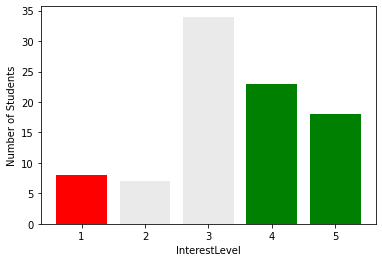

In [28]:
plt.bar(interestlevel.InterestLevel, interestlevel.Gender, color=['red','#eaeaea','#eaeaea','green', 'green'])
plt.xlabel("InterestLevel")
plt.ylabel("Number of Students")

A plot showing us how interested students are in taking the course

In [29]:
firstchoice = df['Was a computing major/certificate your first choice, or did you change majors from a different CCM program? If you changed majors, indicate what your first major was.']
firstchoice

0      First Choice
1           Nursing
2      First Choice
3               NaN
4      First Choice
           ...     
293    First Choice
294    First Choice
295    First Choice
296             NaN
297    First Choice
Name: Was a computing major/certificate your first choice, or did you change majors from a different CCM program? If you changed majors, indicate what your first major was., Length: 298, dtype: object

In [30]:
firstchoice.iloc[0:51]

0                                          First Choice
1                                               Nursing
2                                          First Choice
3                                                   NaN
4                                          First Choice
5                                          First Choice
6         completed a degree in Business Administration
7                                          First Choice
8                                            undecided 
9                                          First Choice
10                                         First Choice
11                                                  NaN
12                                           Animation 
13                                                  NaN
14                                         First Choice
15    I changed it a couple times. First one was gam...
16                                   MET/ES Dual Degree
17                                         First

Looks at the first 50 rows of the dataframe.

In [31]:
firstchoice.value_counts()

First Choice                                                                                                                                                                            153
Nursing                                                                                                                                                                                   5
Biology                                                                                                                                                                                   3
Exercise Science                                                                                                                                                                          2
Business Administration                                                                                                                                                                   2
Music Recording                                             

This shows that a computing major was most students first choice. Interesting to note that a few students had a first choice of Nursing.